In [1]:
# Imports
import numpy as np
import pandas as pd
import mdtraj as md
import h5py
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Split dataset into training and test
from sklearn.model_selection import train_test_split

mydata = pd.read_csv("mydata.csv")
mydata.head
#X = mydata.iloc[:,3:234]
#X_1 = mydata.iloc
#y = mydata.iloc[:,2]
#W = mydata.iloc[:,1]/1000
#Xtrain, Xtest, ytrain, ytest, Wtrain, Wtest = train_test_split(X, y, W, test_size=0.25, random_state=None)

<bound method NDFrame.head of         Unnamed: 0        ID        weight  success    bC1-C2    bC1-C3  \
0                0     10001  4.000000e-02        0  0.138340  0.146307   
1                1     10002  4.000000e-02        0  0.144146  0.146664   
2                2     10003  4.000000e-02        0  0.150356  0.144992   
3                3     10004  4.000000e-02        0  0.143985  0.143392   
4                4     10005  1.400000e-01        1  0.142949  0.147550   
...            ...       ...           ...      ...       ...       ...   
208810      208810  10000195  9.611869e-07        0  0.140217  0.147750   
208811      208811  10000196  9.611869e-07        0  0.140145  0.147944   
208812      208812  10000197  9.611869e-07        0  0.140508  0.148545   
208813      208813  10000198  9.611869e-07        0  0.140429  0.147850   
208814      208814  10000199  9.611869e-07        0  0.140437  0.148149   

          bC1-C4    bC1-C5    bC1-C6    bC1-C7  ...  aC18-C19-N1  aC1

In [ ]:
X = mydata.iloc[:,4:1775]
y = mydata.iloc[:,3]
W = mydata.iloc[:,2]/1000
Xtrain, Xtest, ytrain, ytest, Wtrain, Wtest = train_test_split(X, y, W, test_size=0.25, random_state=None)

In [10]:
# Fit model and make predictions
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2, random_state=0)

# For no weights, just remove Wtrain
rfc.fit(Xtrain, ytrain)
predictions = rfc.predict(Xtest)

Overall accuracy: 0.9227070722549996
AUC: 0.7097890827377539


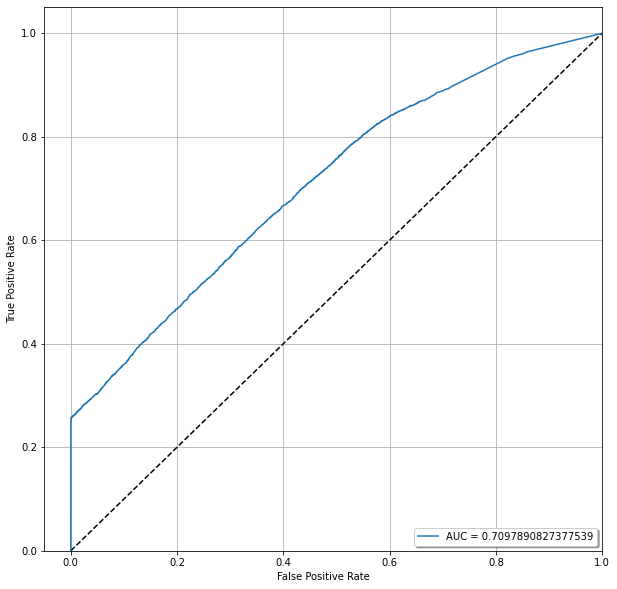

In [11]:
# Evaluate our model
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
acc = rfc.score(Xtest,ytest)
print("Overall accuracy:", acc)
yscore = rfc.predict_proba(Xtest)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(ytest, yscore)

roc_auc = dict()
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

bC1-C2 0.052929133326514964
bC1-C3 0.025675640950440715
bC1-C4 0.034320437566101064
bC1-C5 0.002803863392212656
bC1-C6 0.0019250402276768275
bC1-C7 0.011134428028178385
bC1-C8 0.0030359339856906712
bC1-C9 0.00482389152859921
bC1-C10 0.0
bC1-C11 0.010313716527408746
bC1-C12 0.0
bC1-C13 0.009908717770714377
bC1-C14 0.0
bC1-C15 0.0
bC1-C16 0.006276095472872766
bC1-C17 0.004481832730860632
bC1-C18 0.0
bC1-C19 0.006080504205026256
bC1-N1 0.08465087935123847
bC1-N2 0.13944621540158753
bC1-N3 0.07639248739084895
bC2-C3 0.0
bC2-C4 0.0
bC2-C5 0.0
bC2-C6 0.0
bC2-C7 0.0
bC2-C8 0.0
bC2-C9 0.0
bC2-C10 0.0
bC2-C11 0.0
bC2-C12 0.0
bC2-C13 0.0
bC2-C14 0.0
bC2-C15 0.0
bC2-C16 0.0
bC2-C17 0.0
bC2-C18 0.0
bC2-C19 0.0
bC2-N1 0.049552375415911086
bC2-N2 0.022181367320344106
bC2-N3 0.06272612519881077
bC3-C4 0.0
bC3-C5 0.0
bC3-C6 0.0
bC3-C7 0.0
bC3-C8 0.0
bC3-C9 0.0
bC3-C10 0.0
bC3-C11 0.0
bC3-C12 0.0
bC3-C13 0.0
bC3-C14 0.0
bC3-C15 0.0
bC3-C16 0.0
bC3-C17 0.0
bC3-C18 0.0
bC3-C19 0.0
bC3-N1 0.02100963949705

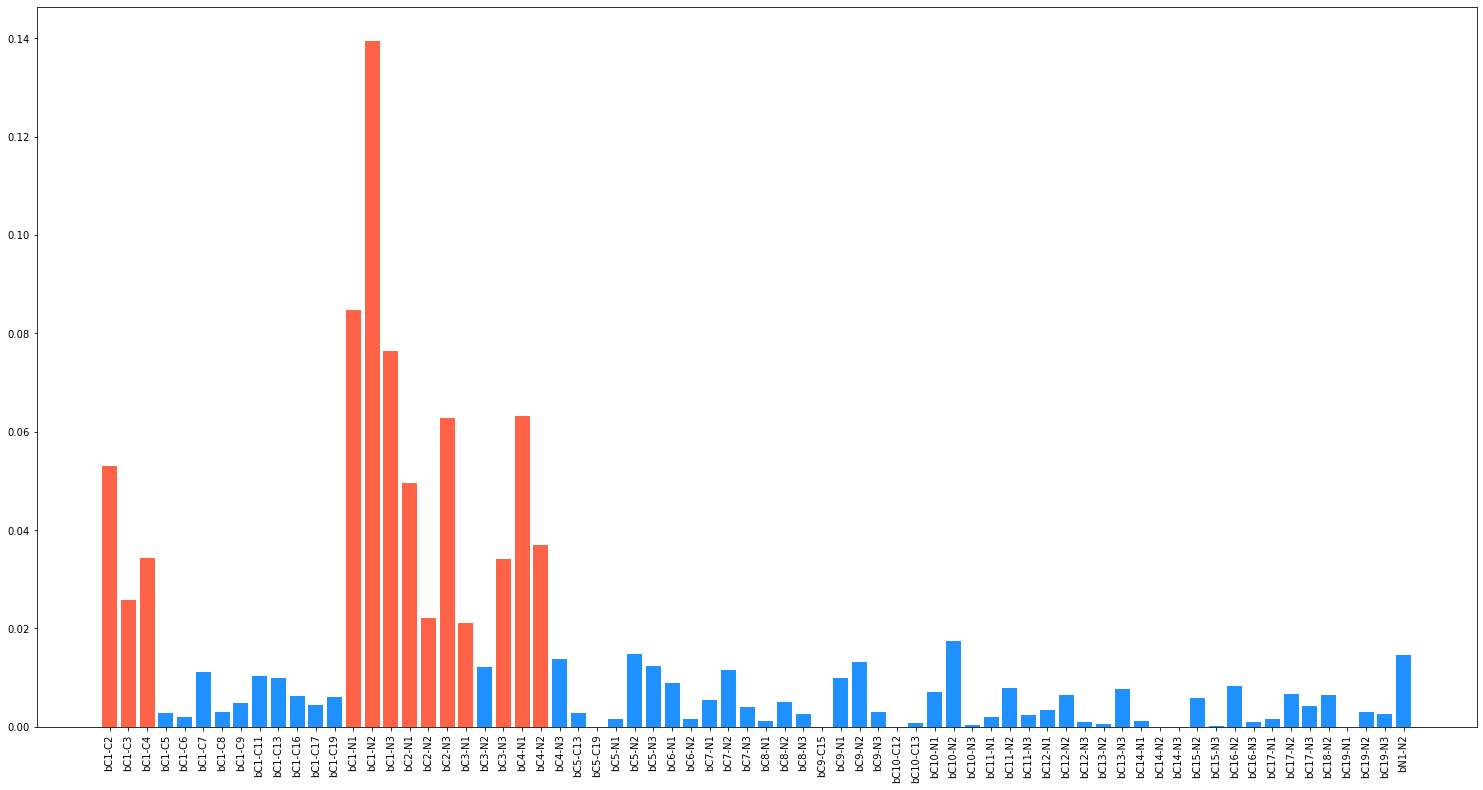

In [13]:
# Plot feature importance
fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0,0,1,1])
importances = list(rfc.feature_importances_)
for i, num in enumerate(importances):
    print(Xtrain.columns[i], num)
    if num == 0:
        continue
    elif num > 0.02:
        ax.bar(Xtrain.columns[i], num, color='tomato')
    else:
        ax.bar(Xtrain.columns[i], num, color='dodgerblue')
        
        
plt.xticks(rotation=90)
left, width = .25, .725
bottom, height = .25, .7
right = left + width
top = bottom + height
#ax.text(right, top, 'Random Forest Feature Importance',
#        horizontalalignment='right',
#        verticalalignment='top',
#        fontsize=40,
#        transform=ax.transAxes)
plt.show()